# EDA

El siguiente notebook tiene por propósito mostrar algunos comandos básicos para poder realizar Exploración de Datos utilizando Pandas.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos a cargar los siguientes datos para poder explorarlos.
iris_df = sns.load_dataset("iris")
titanic_df = sns.load_dataset("titanic")
ts_df = sns.load_dataset("dowjones")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Medidas de Tendencia Central

Los comandos `.mean()` y `.median()` permiten calcular la *media* y la *mediana* en datos numéricos. Como se ve en los ejemplos permite llamar una `Serie` de Pandas y calcular un valor.

> Tip: En caso de querer aplicar estos comandos a un DataFrame se recomienda utilizar el flag `numeric_only = True` para evitar calcular estos valores en Datos Categóricos donde no hacen sentido.

In [4]:
print(f"Promedio de Ancho de Petalo {iris_df['sepal_width'].mean()}")
print(f"Mediana de Largo de Petalo {iris_df['sepal_length'].median()}")

Promedio de Ancho de Petalo 3.0573333333333337
Mediana de Largo de Petalo 5.8


Pandas también cuenta con el comando `.mode()` el cuál devuelve la moda. A diferencia de los comandos anteriores, `.mode()` puede utilizarse tanto para datos categóricos como datos numéricos.

In [5]:
print(f"Moda de Especies: ")
iris_df["species"].mode()

Moda de Especies: 


0        setosa
1    versicolor
2     virginica
Name: species, dtype: object

El comando `.quantile()` permite calcular algún percentil de interés. `q` es un valor que va entre 0 y 1 para indicar el percentil requerido. Recordar que la mediana es equivalente al Percentil 50.

In [6]:
p25 = iris_df["sepal_width"].quantile(q=0.25)
p50 = iris_df["sepal_width"].quantile(q=0.50)
p75 = iris_df["sepal_width"].quantile(q=0.75)
iris_df["sepal_width"].median(), p25, p50, p75

(3.0, 2.8, 3.0, 3.3)

## Medidas de Dispersión

Pandas permite el cálculo de distintas medidas de dispersión. Al igual que los comandos anteriores contiene el flag `numeric_only = True` para evitar inconvenientes en DataFrames con distintos data types. Además contiene el comando `ddof` el cuál permitirá diferenciar si se quiere la medida *poblacional* (`ddof = 0`) o la *muestral* (`ddof = 1`).

In [7]:
# Varianza Poblacional
iris_df.var(numeric_only=True, ddof=0)

sepal_length    0.681122
sepal_width     0.188713
petal_length    3.095503
petal_width     0.577133
dtype: float64

In [8]:
# Varianza Muestral
iris_df.var(numeric_only=True, ddof=1)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [9]:
# Desviación Estándar Muestral
iris_df.std(numeric_only=True, ddof=1)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [10]:
# Función para calcular el Rango Intercuartil...
def calculate_IQR(column):
    quantiles = iris_df.quantile([0.25, 0.75], numeric_only=True)
    iqr_sl = quantiles.loc[0.75, column] - quantiles.loc[0.25, column]
    return iqr_sl


calculate_IQR("sepal_length")
calculate_IQR("petal_width")

1.5

In [11]:
# Coeficiente de Skewness o Asimetría.
iris_df.skew(numeric_only=True)

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

## Visualizaciones

A continuación se mostrarán comandos propios de Pandas para poder generar los gráficos visto a lo largo de las clases. 
Se sugiere este tipo de gráficos cuando se trabaje con DataFrames ya que poseen buena documentación y una interfaz común para todos los gráficos.

Opciones:

* `kind`: Permite indicar mediante un string el tipo de gráfico a mostrar. 
* `figsize = (w,h)`: Permite fijar el tamaño de la figura. Notar que primero se entrega el ancho y luego el alto. Yo normalmente uso (20,6) ya que considero que queda bastante bien. 
* `edgecolor`: Permite indicar el color del borde de las barras mediante un string. Tiene sentido para histogramás y bar plots. 
* `grid = True/False`: Permite mostrar o no una grilla.
* `bins = n`: Opción sólo para histogramas que permite indicar en cuántos bins se dividen los datos en el Histograma.
* `alpha = 0.5`: Corresponde al grado de transparecencia. Es un valor que va entre 0 y 1. Entre más pequeño el valor, más transparente.
* `title`: Permite agregar un Título como String. 
* `xlabel`: Permite agregar un Título al Eje X. 
* `ylabel`: Permite agregar un Título al Eje Y. 

### Histogramas

In [ ]:
iris_df.plot(
    kind="hist", alpha=0.5, bins=30, figsize=(20, 6), edgecolor="black"
)
# Notar que este genera todos los histogramas superpuestos...

Por alguna razón Pandas tiene el comando `.hist()`. Este comando es bastante útil porque a diferencia del anterior no superpone los histogramas, lo cual la mayoría de las veces es lo que se busca. 

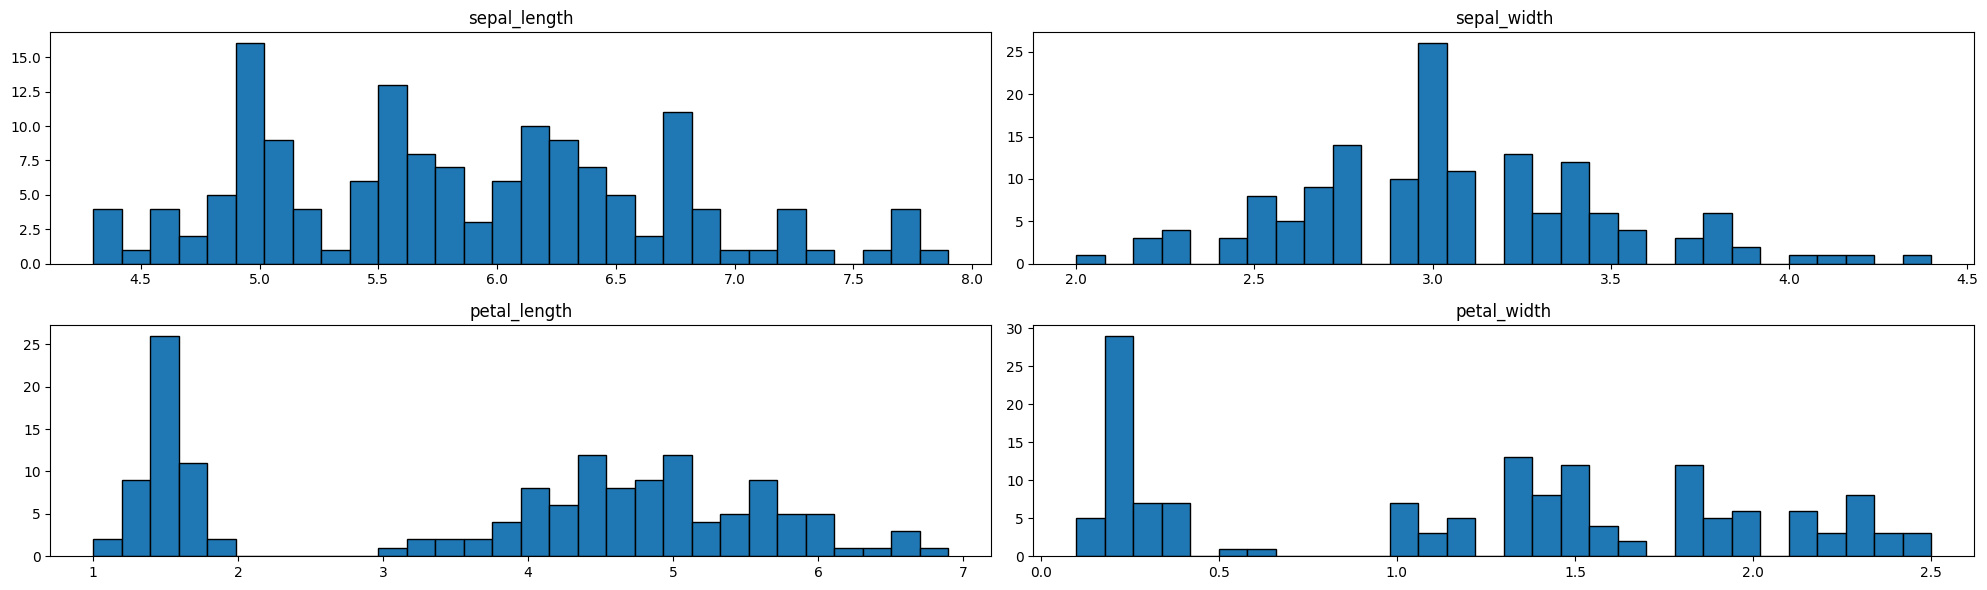

In [17]:
iris_df.hist(figsize=(20, 6), bins=30, edgecolor="black", grid=False)
# tight_layout es opcional y a veces evita que hayan traslapes de títulos.
# Usarlo si es que es necesario.
plt.tight_layout()

### Barplots

A diferencia de los Histográmas, los Barplots son utilizados para aplicar una agregación antes de gráficar. 
Esta agregación se puede utilizar mediante `.value_counts()` que permite contar valores, o mediante `.groupby()` el cuál permite aplicar otros tipos de agregación.

In [19]:
# Acá por ejemplos contamos la cantidad de pasajeros por Sexo
titanic_df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

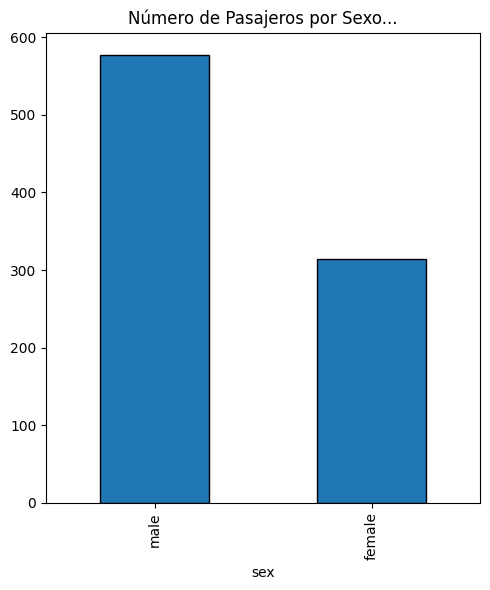

In [21]:
# Una vez que tenemos contados los elementos podemos graficar...
titanic_df["sex"].value_counts().plot(
    kind="bar",
    figsize=(5, 6),
    title="Número de Pasajeros por Sexo...",
    edgecolor="black",
)
plt.tight_layout()

In [23]:
## Otro ejemplo, en este caso calculando el promedio por de Edad y Tarifa por Año.
titanic_df.groupby("pclass")[["age", "fare"]].mean()

,age,fare
pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


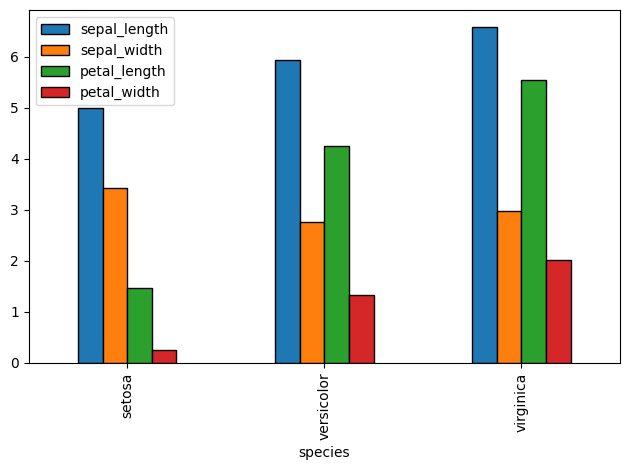

In [25]:
## En este caso, el índice Pclass irá al Eje X y los valores agregados de Age y Fare irán como barras.
iris_df.groupby("species").mean().plot(kind="bar", edgecolor="black")
plt.tight_layout()

## Boxplots

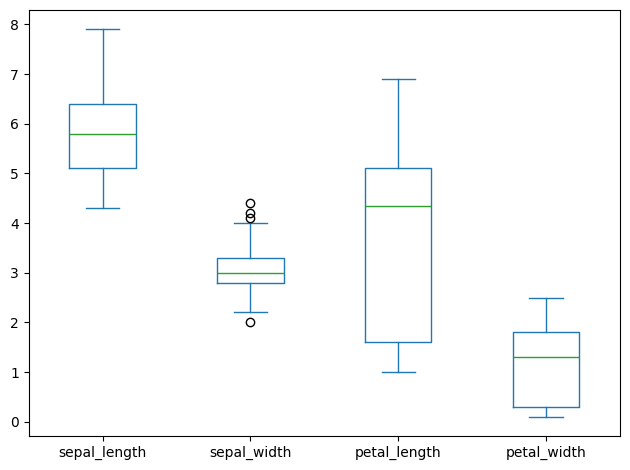

In [27]:
iris_df.drop(columns="species").plot(kind="box")
plt.tight_layout()

### Puntos

> Notar que a diferencia de los casos anteriores, el gráfico de puntos requiere que se definan qué columna irá en `x` y en `y` respectivamente.

In [ ]:
iris_df.plot(
    x="petal_length",
    y="petal_width",
    kind="scatter",
    title="Largo de Pétalo vs Ancho de Pétalo",
    xlabel="Largo",
    ylabel="Ancho",
)

## Lineplot

El lineplot es el gráfico por defecto de Pandas, por lo tanto no es necesario definir el parámetro `kind`. Al igual que el gráfico de Puntos se debe definir las variables `x` e `y`. Se recomienda siempre que `x` sea una variable de tipo temporal.

In [ ]:
ts_df.plot(x="Date", y="Price", title="Evolución del Dow Jones")

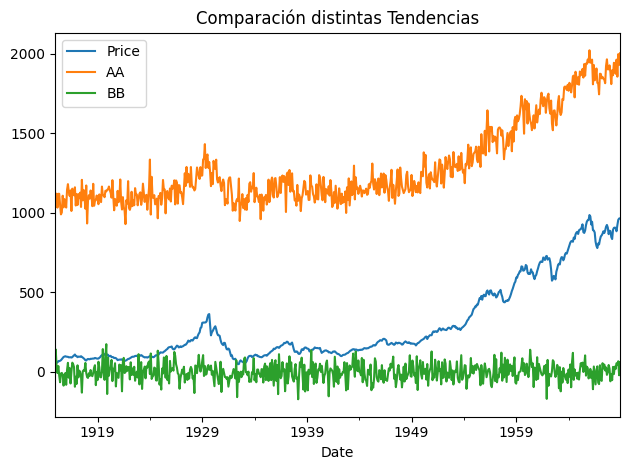

In [29]:
## Este es un ejemplo de varias series de tiempo en conjunto.
## Este código sólo genera datos sintéticos.
from scipy.stats import norm

ts_df["AA"] = ts_df["Price"] + norm.rvs(size=649) * 55 + 1000
ts_df["BB"] = -norm.rvs(size=649) * 55

ts_df.set_index("Date").plot(title="Comparación distintas Tendencias")
plt.tight_layout()

## Mosaico

En muchas ocaciones nosotros queremos mostrar una compilación de todos nuestros gráficos más que cada uno por separado. Para eso Matplotlib cuenta con la opción Mosaico. 

Mosaico permite generar una grilla definida como un String. Si se fijan nuestra grilla se define por el string:
    
```python
"""AAA
   BCC"""
```
   
En este caso nuestro canvas se divide en 6 partes, el gráfico que asigne a `A` utilizará las 3 secciones superiores, `B` utilizará sólo la sección de abajo a la izquierda y `C` utilizará las 2 restantes. 

Para asignar cada sección `.plot()` de pandas posee el parámetro `ax` donde se debe generar la asignación. 

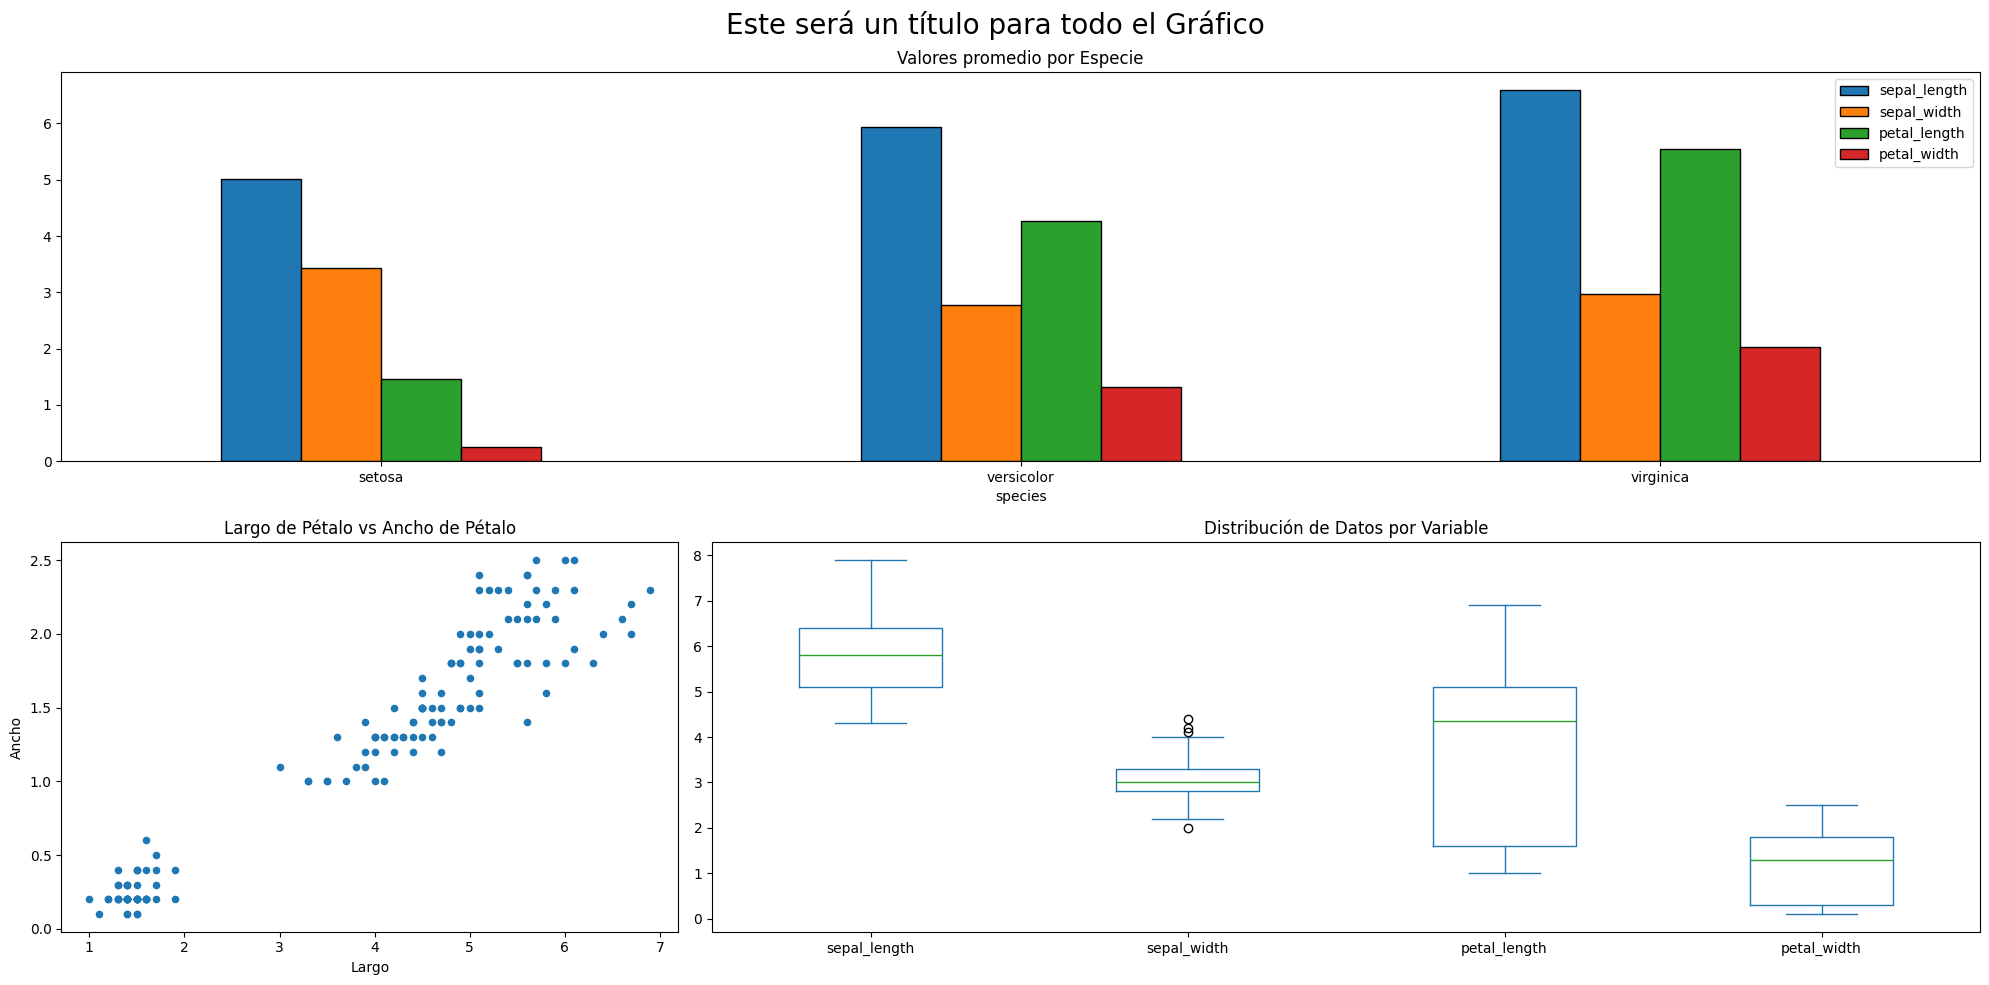

In [32]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplot_mosaic(
    """AAA
       BCC"""
)

# Gráfico asignado a C
iris_df.drop(columns="species").plot(
    kind="box", ax=ax["C"], title="Distribución de Datos por Variable"
)

## Gráfico asignado a B
iris_df.plot(
    x="petal_length",
    y="petal_width",
    kind="scatter",
    title="Largo de Pétalo vs Ancho de Pétalo",
    xlabel="Largo",
    ylabel="Ancho",
    ax=ax["B"],
)

## Gráfico asignado a A
iris_df.groupby("species").mean().plot(
    kind="bar",
    edgecolor="black",
    ax=ax["A"],
    rot=0,
    title="Valores promedio por Especie",
)

## Permite Agregar un título general a todo el Gráfico
plt.suptitle("Este será un título para todo el Gráfico", fontsize=20)
plt.tight_layout()

## Matplotlib

Los comandos mostrados anteriormente son una adaptación de Matplotlib a Pandas. La gracia que tienen es que son fáciles de aprender y funcionarán directamente en Pandas que será nuestra principal fuente de datos. 

En el caso de trabajar con Numpy, estos comandos `NO FUNCIONARÁN`. Por lo tanto es necesario utilizar la API de Matplotlib. 
La traducción no es 100% directa, pero normalmente todos los parámetros de `.plot()` se cambiarán por comandos del tipo `plt.---`



## Ejemplo

```python
plt.plot(x,y, c = "red") #Existe también plt.bar, plt.hist, plt.scatter, plt.boxplot.
plt.title("Este va a ser un título")
plt.xlabel("Este será una etiqueta del Eje X")
```

Aprender Matplotlib es bastante más complicado pero tiene funcionalidades muchísimo más avanzadas que Pandas. Para este curso, no será necesario especializarse en Matplotlib, pero sí más adelante utilizaremos algunos gráficos que no se pueden hacer tan fácilmente en Pandas (pero serán casos puntuales).